# Machine Learning - Exercise 1
# Classification Evaluation

This exercise illustrates examples of evaluation of solutions of classification problems.

## Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [2]:
import random
import numpy as np
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("Libraries imported.")

Libraries imported.


## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/index.html


### IRIS dataset

In [3]:
DB = datasets.load_iris()
dataset_name = "Iris"

### Wine dataset

In [4]:
DB = datasets.load_wine()
dataset_name = "Wines"

### Digits dataset

In [5]:
DB = datasets.load_digits()
dataset_name = "Digits"

### Summary of the dataset

Print some information about the dataset

In [7]:
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

print(X_all.shape)
print(y_all.shape)

print("Dataset: %s" %(dataset_name))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

(1797, 64)
(1797,)
Dataset: Digits
Number of attributes/features: 64
Number of classes: 10 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of samples: 1797


### Show an example

Display a random sample.

In [ ]:
id = random.randrange(0,X_all.shape[0])

print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

x85 = array([1.267e+01, 9.800e-01, 2.240e+00, 1.800e+01, 9.900e+01, 2.200e+00,
       1.940e+00, 3.000e-01, 1.460e+00, 2.620e+00, 1.230e+00, 3.160e+00,
       4.500e+02])
y85 = 1 ['class_1']


## Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, 
                                                    random_state=14)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

Size of training set: 118
Size of test set: 60


## Create a Model 

Model fitting = finding a solution that is stored in the model.

IMPORTANT: solution depends on data split

**Support Vector Machines**

In [ ]:
model = svm.SVC(kernel='linear', C=1)


Probabilistic generative model 

**Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()


Probabilistic discriminative model

**Logistic regression**

In [ ]:
model = LogisticRegression()

## Fit the model

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict on test set

Use test set for prediction.

In [ ]:
y_pred = model.predict(X_test)

##Evaluate the Model

Evaluation of a specific solution.

### Accuracy

In [ ]:
acc = model.score(X_test, y_test)    
print("Accuracy %.3f" %acc)



Accuracy 0.933


### Precision & Recall

In [ ]:
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))


              precision    recall  f1-score   support

     class_0      0.958     0.958     0.958        24
     class_1      0.909     0.909     0.909        22
     class_2      0.929     0.929     0.929        14

    accuracy                          0.933        60
   macro avg      0.932     0.932     0.932        60
weighted avg      0.933     0.933     0.933        60



### Confusion Matrix

[[23  1  0]
 [ 1 20  1]
 [ 0  1 13]]


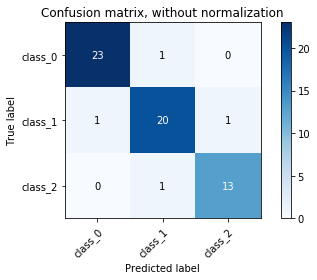

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

## Evaluate a specific instance of a method

Evaluation of a specific method with instantiated hyper-parameters
through Cross Validation



In [ ]:
newmodel = svm.SVC(kernel='linear', C=1)
cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=120)
scores = cross_val_score(newmodel, X_all, y_all, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  

[0.96666667 0.93333333 0.96666667 0.95       0.96666667]
Accuracy: 0.957 (+/- 0.03)


## Search for best hyper-parameters

Tuning of hyper-parameters.

Grid search tries multiple configurations of hyper-prameters.

In [ ]:
parameters = {'kernel':['linear', 'poly', 'rbf'], 'C':[0.01, 0.1, 1, 10, 100]  }
modelclass = svm.SVC(gamma='scale') 
gridmodel = GridSearchCV(modelclass, parameters, cv=5, iid=False)
gridmodel.fit(X_all, y_all)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Check the results of grid search

In [ ]:
#print(gridmodel.cv_results_)

for i in range(0,len(gridmodel.cv_results_['params'])):
    print("[%2d] params: %s  \tscore: %.3f +/- %.3f" %(i,
        gridmodel.cv_results_['params'][i],
        gridmodel.cv_results_['mean_test_score'][i],
        gridmodel.cv_results_['std_test_score'][i] ))

a = np.argmax(gridmodel.cv_results_['mean_test_score'])
bestparams = gridmodel.cv_results_['params'][a]
bestscore = gridmodel.cv_results_['mean_test_score'][a]

print("Best configuration [%d] %r  %.3f" %(a,bestparams,bestscore))
print("Best kernel: %s" %(bestparams['kernel']))
print("Best C: %s" %(bestparams['C']))

[ 0] params: {'C': 0.01, 'kernel': 'linear'}  	score: 0.905 +/- 0.035
[ 1] params: {'C': 0.01, 'kernel': 'poly'}  	score: 0.629 +/- 0.059
[ 2] params: {'C': 0.01, 'kernel': 'rbf'}  	score: 0.399 +/- 0.009
[ 3] params: {'C': 0.1, 'kernel': 'linear'}  	score: 0.978 +/- 0.020
[ 4] params: {'C': 0.1, 'kernel': 'poly'}  	score: 0.647 +/- 0.048
[ 5] params: {'C': 0.1, 'kernel': 'rbf'}  	score: 0.675 +/- 0.036
[ 6] params: {'C': 1, 'kernel': 'linear'}  	score: 0.962 +/- 0.050
[ 7] params: {'C': 1, 'kernel': 'poly'}  	score: 0.664 +/- 0.036
[ 8] params: {'C': 1, 'kernel': 'rbf'}  	score: 0.664 +/- 0.039
[ 9] params: {'C': 10, 'kernel': 'linear'}  	score: 0.962 +/- 0.053
[10] params: {'C': 10, 'kernel': 'poly'}  	score: 0.664 +/- 0.053
[11] params: {'C': 10, 'kernel': 'rbf'}  	score: 0.726 +/- 0.049
[12] params: {'C': 100, 'kernel': 'linear'}  	score: 0.962 +/- 0.053
[13] params: {'C': 100, 'kernel': 'poly'}  	score: 0.703 +/- 0.058
[14] params: {'C': 100, 'kernel': 'rbf'}  	score: 0.743 +/- 0.

## Final Model

In [ ]:
bestmodel = svm.SVC(kernel=bestparams['kernel'], C=bestparams['C'], gamma='scale', probability=True)
bestmodel.fit(X_all, y_all)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Prediction of a new sample

In [ ]:
if dataset_name == "Iris":
  xnew = np.array([8.5, 2.6, 9.2, 0.3])
elif dataset_name == "Wines":
  xnew = np.array([12, 2.5, 2.6, 15, 186, 1.5, 9.1,
                   0.44, 2.2, 5.6, 2.9, 3.7, 380])
elif dataset_name == "Digits":
   xnew = np.array([  
        0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6,
       16,  3,  0,  0,  0,  0, 10,  1, 13,  0,  0,  0,  0,
        0,  7, 14,  2,  0,  0,  0,  0,  0,  7, 13,  1,  0,
        0,  0,  0,  0,  0,  8, 13,  1,  0,  0,  0,  0,  0,
       13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0])

xnew = xnew.reshape(1,-1)

print("x_new = %r" %(xnew))
ynew = bestmodel.predict(xnew)
print("y_pred = %d %s" %(ynew,class_names[ynew]))

mconf = np.max(bestmodel.predict_proba(xnew))
print("Confidence: %.2f" %(mconf))


x_new = array([[ 12.  ,   2.5 ,   2.6 ,  15.  , 186.  ,   1.5 ,   9.1 ,   0.44,
          2.2 ,   5.6 ,   2.9 ,   3.7 , 380.  ]])
y_pred = 1 ['class_1']
Confidence: 0.84


##Common Mistake

Evaluate solution on data used for training!!!


In [ ]:
bestmodel.score(X_all,y_all)

0.9775280898876404

Question 1

Design and evaluation procedure to asses and compare the different performance of each classification model seen above on the digits dataset

Consider the unbalanced Digits dataset and compare one of the above classification method with the classifier that always returns the most common label in the dataset. Which performance metrics are significant in this comparison